# Import the libraries

In [1]:
!pip install bs4

     |████████████████████████████████| 115 kB 830 kB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=50deb61581e802670995b6027d53fe9cf395f51d1701b42def34bdc525edff66
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import string
import re
from bs4 import BeautifulSoup


import warnings
warnings.filterwarnings('ignore')

## Read the csv's

In [3]:
fake = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")
true = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")

## How many rows and columns does it have

In [4]:
fake.shape, true.shape

((23481, 4), (21417, 4))

## How does the datasets look like

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Adding a target column towards the end and adding Fake and True for each row

In [7]:
fake['target'] = 'Fake'
true['target'] = 'True'

In [8]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [9]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


## Concatenating the fake and true dataframes

In [10]:
merge_fake_real = pd.concat([fake, true], axis = 0, ignore_index = True)

In [11]:
merge_fake_real

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


<AxesSubplot:xlabel='target', ylabel='count'>

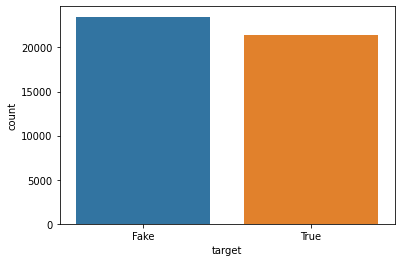

In [12]:
sns.countplot(x = 'target', data = merge_fake_real)

## This dataset looks balanced dataset.

# Data Cleaning

## Strip Html

In [13]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

## Remove Square Brackets

In [14]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

## Remove Urls

In [15]:
def remove_urls(text):
    return re.sub('http\S+', '', text)

## Remove Stopwords

In [16]:
stop  = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

## Data Cleaning all together

In [17]:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    return text

In [18]:
merge_fake_real['text'] = merge_fake_real['text'].apply(denoise_text)

In [19]:
merge_fake_real

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump wish Americans Happy New Year lea...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"Friday, revealed former Milwaukee Sheriff Davi...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"Christmas day, Donald Trump announced would ba...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used annual Christmas Day message...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) NATO allies Tuesday welcome...,worldnews,"August 22, 2017",True
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) LexisNexis, provider legal, r...",worldnews,"August 22, 2017",True
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) shadow disused Soviet-era fact...,worldnews,"August 22, 2017",True
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) Vatican Secretary State Cardi...,worldnews,"August 22, 2017",True


<AxesSubplot:xlabel='subject', ylabel='count'>

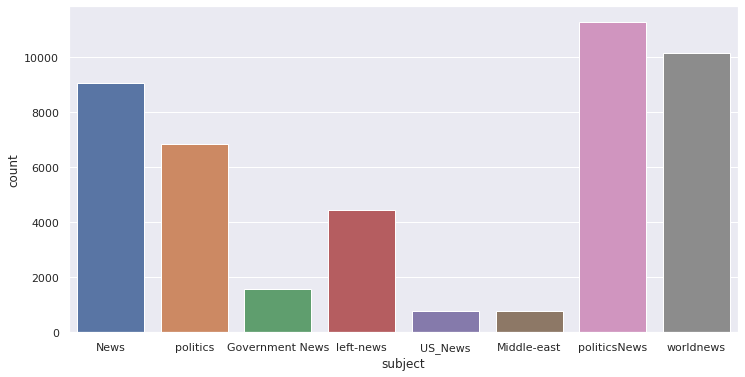

In [20]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (12, 6))
sns.countplot(x = "subject", data = merge_fake_real)

<AxesSubplot:xlabel='subject', ylabel='count'>

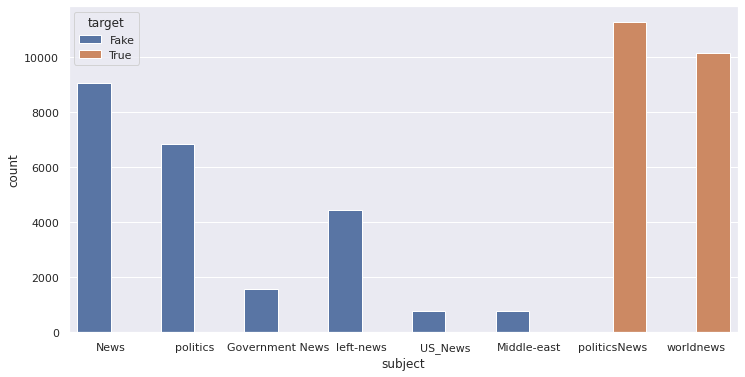

In [21]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (12, 6))
sns.countplot(merge_fake_real['subject'], hue = merge_fake_real['target'])

<AxesSubplot:xlabel='subject', ylabel='count'>

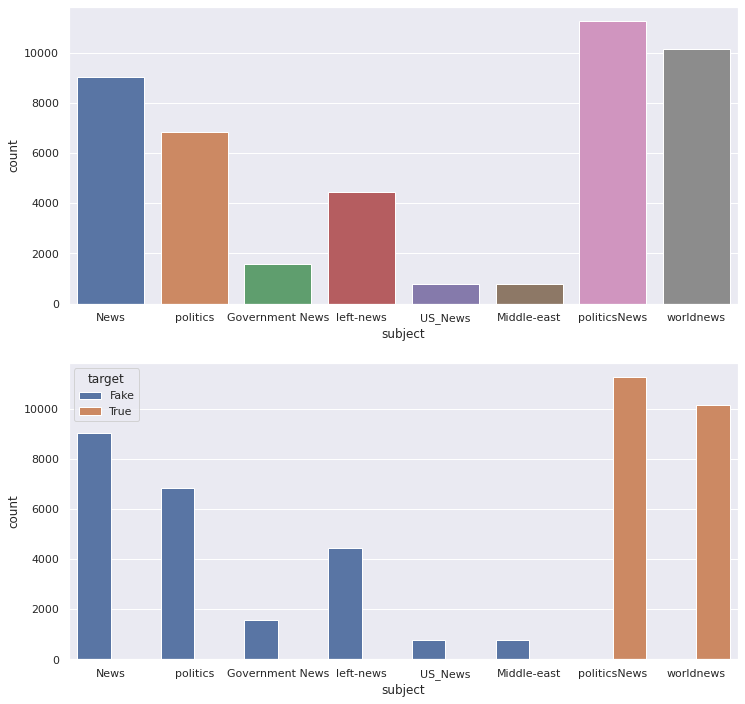

In [22]:
fig, ax = plt.subplots(2, 1, figsize = (12, 12))
sns.countplot(merge_fake_real['subject'], ax = ax[0])
sns.countplot(merge_fake_real['subject'], hue = merge_fake_real['target'], ax = ax[1])

## Check for null values if any

In [23]:
merge_fake_real['text'].isna().sum()

0

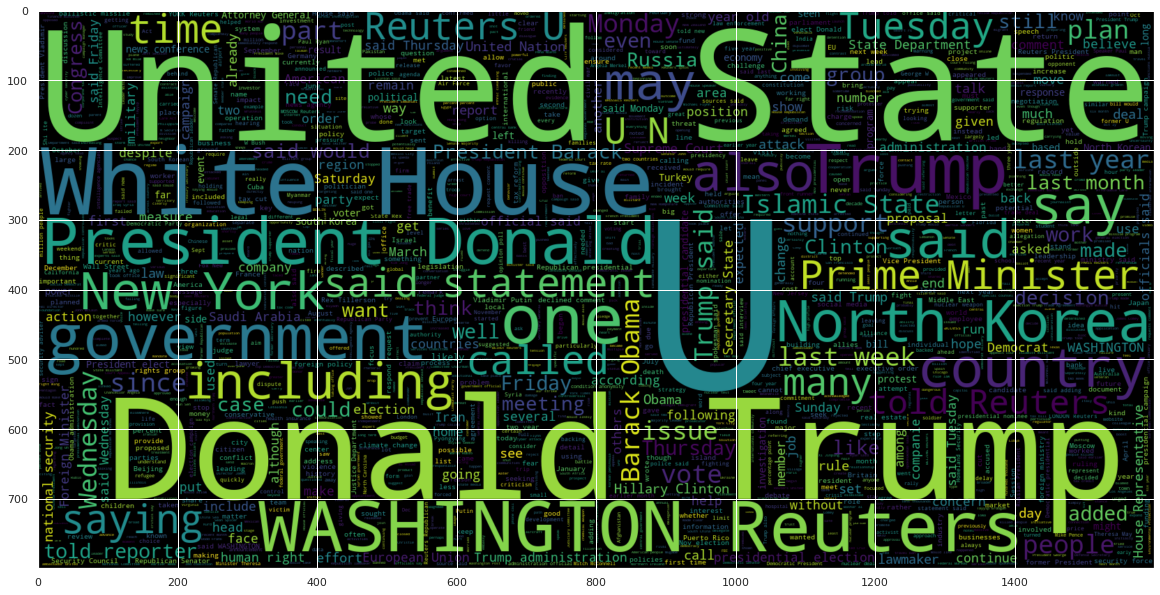

In [24]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000,
               width = 1600,
               height = 800,
               stopwords = stop)
wc.generate(" ".join(merge_fake_real[merge_fake_real['target'] == 'True'].text))
plt.imshow(wc, interpolation = 'bilinear')

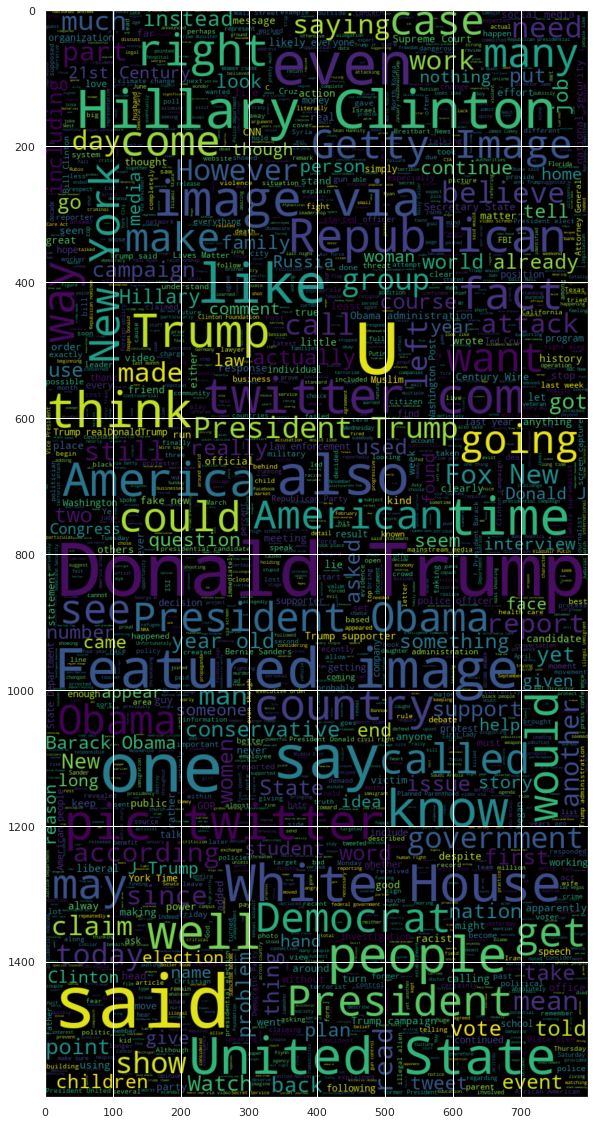

In [25]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000,
               height = 1600,
               width = 800,
               stopwords = stop)
wc.generate(" ".join(merge_fake_real[merge_fake_real['target'] == 'Fake'].text))
plt.imshow(wc, interpolation = 'bilinear')

## Text Length of the Fake and Real News

(array([2.225e+04, 9.610e+02, 1.510e+02, 5.400e+01, 3.300e+01, 1.000e+01,
        1.000e+01, 2.000e+00, 2.000e+00, 8.000e+00]),
 array([    0. ,  4014.4,  8028.8, 12043.2, 16057.6, 20072. , 24086.4,
        28100.8, 32115.2, 36129.6, 40144. ]),
 <BarContainer object of 10 artists>)

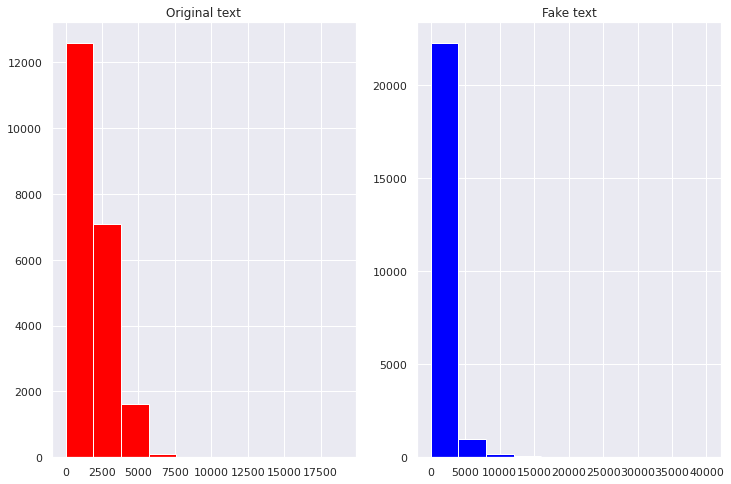

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))
text_len = merge_fake_real[merge_fake_real['target'] == 'True']['text'].str.len()
ax1.hist(text_len, color = 'red')
ax1.set_title('Original text')
text_len = merge_fake_real[merge_fake_real['target'] == 'Fake']['text'].str.len()
ax2.set_title('Fake text')
ax2.hist(text_len, color = 'blue')

## Average word length of Fake and Real News

Text(0.5, 0.98, 'Average World Length in Each Text')

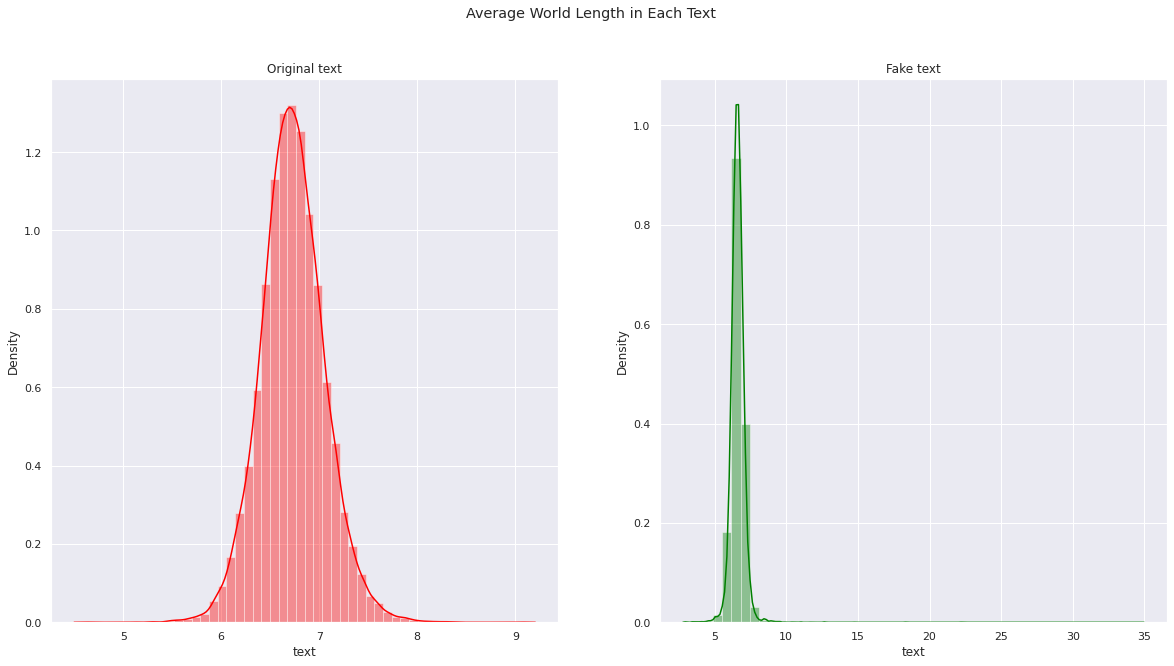

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
word_len = merge_fake_real[merge_fake_real['target'] == 'True']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word_len.map(lambda x: np.mean(x)), ax = ax1, color = 'red')
ax1.set_title('Original text')
word_len = merge_fake_real[merge_fake_real['target'] == 'Fake']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word_len.map(lambda x: np.mean(x)), ax = ax2, color = 'green')
ax2.set_title('Fake text')
fig.suptitle('Average World Length in Each Text')

In [28]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus = get_corpus(merge_fake_real['text'])

In [29]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)

In [30]:
most_common

{'Trump': 101288,
 'said': 93137,
 'would': 54351,
 'U.S.': 46115,
 'people': 32968,
 'President': 32294,
 'also': 30314,
 'one': 29297,
 'Donald': 27015,
 'said.': 26195}

## Split the data into Independent and Dependent variables

In [31]:
X = merge_fake_real['text']
y = merge_fake_real['target']

## Use dummies for target

In [32]:
y = pd.get_dummies(y, drop_first = True)

In [33]:
X.head()

0    Donald Trump wish Americans Happy New Year lea...
1    House Intelligence Committee Chairman Devin Nu...
2    Friday, revealed former Milwaukee Sheriff Davi...
3    Christmas day, Donald Trump announced would ba...
4    Pope Francis used annual Christmas Day message...
Name: text, dtype: object

In [34]:
y

,True
0,0
1,0
2,0
3,0
4,0
...,...
44893,1
44894,1
44895,1
44896,1


In [35]:
y = y.values.reshape(-1,)

In [36]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

## Using TfidfVectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [38]:
tfvector = TfidfVectorizer(stop_words = stop, max_df = 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [39]:
X_train

23210    Paul Crag RobertsA month ago wrote column Hesi...
6458     First said wages high, said work raise minimum...
3180     Donald Trump attacked American car company got...
9389     Houston, Texas trial lawyer Democrat mega-dono...
28041    (Reuters) North Carolina Thursday repealed law...
                               ...                        
12363    San Antonio, Texas school fire outrageous skit...
5695     Pastor Steven Anderson Faithful Word Baptist C...
8006     one Antonin Scalia last rulings Supreme Court,...
17745    Paul Joseph Watson nails again. video below, W...
17931    June 2017, reported newly-crowned NBA champion...
Name: text, Length: 35918, dtype: object

In [40]:
X_test

20859    Obama added millions onto taxpayer tab trip Cu...
5680     June 13, 80-year-old Edward Acquisto shot kill...
30826    SAN DIEGO (Reuters) U.S. judge overseeing laws...
35375    COPENHAGEN (Reuters) Denmark right-wing govern...
1764     Trump loyalty Vladimir Putin tested like never...
                               ...                        
16450    Communities like Ferguson, Baltimore Milwaukee...
33432    (Reuters) Donald Trump presidency would bad co...
17671    couple quick questions come mind law-abiding A...
6179     one ever accused Bundy boys intelligent. grasp...
8867     2013, Gilead Sciences Inc. filed application F...
Name: text, Length: 8980, dtype: object

In [41]:
X_train = tfvector.fit_transform(X_train)
X_test = tfvector.transform(X_test)

In [42]:
X_train

<35918x107391 sparse matrix of type '<class 'numpy.float64'>'
	with 5846975 stored elements in Compressed Sparse Row format>

In [43]:
X_test

<8980x107391 sparse matrix of type '<class 'numpy.float64'>'
	with 1461809 stored elements in Compressed Sparse Row format>

## Using Logistic Regression on top of vectors created by TfidfVectorizer

In [44]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [45]:
pred_data = logit.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, pred_data)
cr = classification_report(y_test, pred_data)
cm = confusion_matrix(y_test, pred_data)

In [47]:
print('The Accuracy of the model is ', round(acc*100, 2), '%')
print('-------'*12)
print('Classification Report is ', cr)
print('-------'*12)

The Accuracy of the model is  98.62 %
------------------------------------------------------------------------------------
Classification Report is                precision    recall  f1-score   support

           0       0.99      0.99      0.99      4739
           1       0.99      0.98      0.99      4241

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

------------------------------------------------------------------------------------


Text(30.5, 0.5, 'y_test')

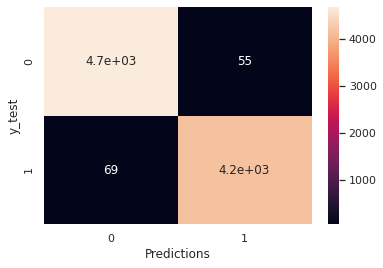

In [48]:
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predictions')
ax.set_ylabel('y_test')

## Using CountVectorizer

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [51]:
model2 = LogisticRegression()

In [52]:
model2.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = model2.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [55]:
print('The Accuracy of the model is ', round(acc*100, 2), '%')
print('-------'*12)
print('Classification Report is ', cr)
print('-------'*12)

The Accuracy of the model is  99.64 %
------------------------------------------------------------------------------------
Classification Report is                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4739
           1       1.00      1.00      1.00      4241

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

------------------------------------------------------------------------------------


Text(30.5, 0.5, 'y_test')

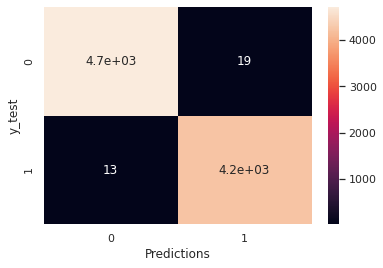

In [56]:
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predictions')
ax.set_ylabel('y_test')

## CountVectorizer seems to be performing well compared to Tfidf Vectorizer.